# GCNによるpolbooks埋め込み


! conda activate kmedoids

In [1]:

import time
import networkx as nx
from torch_geometric.utils.convert import to_networkx, from_networkx
from torch_geometric.datasets import KarateClub
import matplotlib.pyplot as plt
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import gcn_polbooks as gcn
from gcn_polbooks import GCN
import numpy as np
from sklearn_extra.cluster import KMedoids #K-Medoids
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score #ARI
import random
import sys
from statistics import stdev
import warnings

warnings.filterwarnings("ignore")


/opt/anaconda3/envs/kmedoids/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 実行回数
TIMES = 10

#ランダムのデータで学習する場合の学習データ(ノード情報)数
NUM_TRAIN = 24

#エポック数
EPOCH = 40

#学習状況及び結果を図示するか
VIEW_TRAIN = False

#埋め込み結果、クラスタリング結果を表示するか
VIEW_CLUSTERING = True

#  クラスタ数
N_CLUSTER = 3

#GCNの学習に使う教師データ KARATE or LOUVAIN
TRUE_LABEL = gcn.get_label_list("polbooks")

#クラスタリングに用いる手法
"""
kmeans : "kmeans"
kmedoids : "kmedoids"
"""
METHOD = "kmeans"

DATA = gcn.generate_Graph("polbooks")

#==========================================================

# 学習に用いるノードの数
num_node_list = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 34]

# エポック数
epoch_list = [200]


===========================1回目============================
埋め込み結果


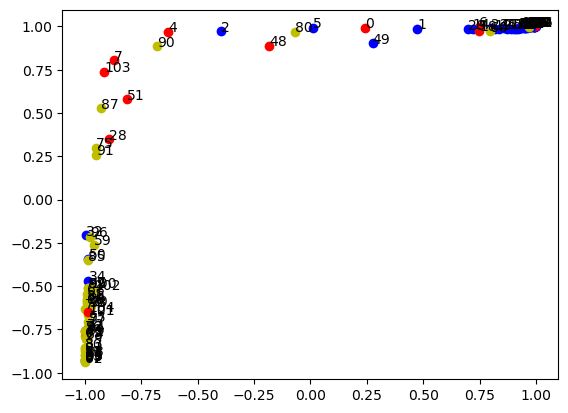

クラスタリング結果


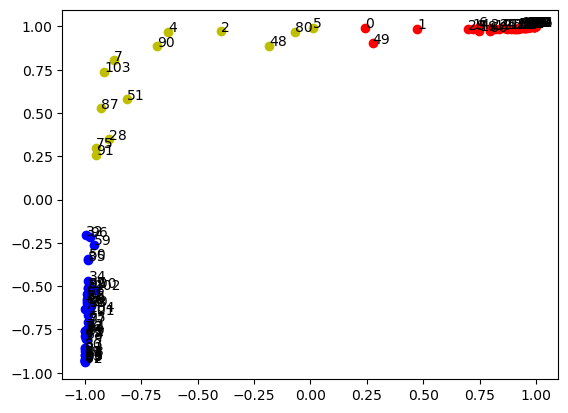

1回目 ARI : 0.5265811309818181
===========================2回目============================
埋め込み結果


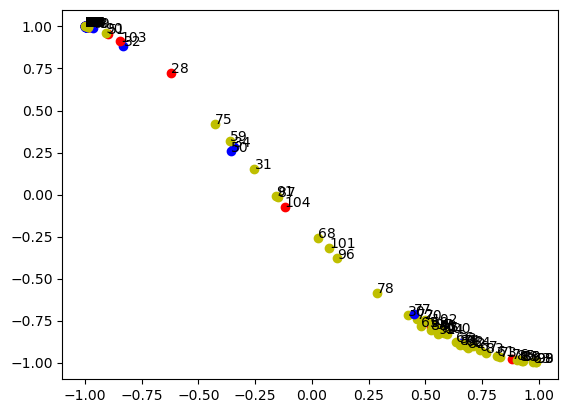

クラスタリング結果


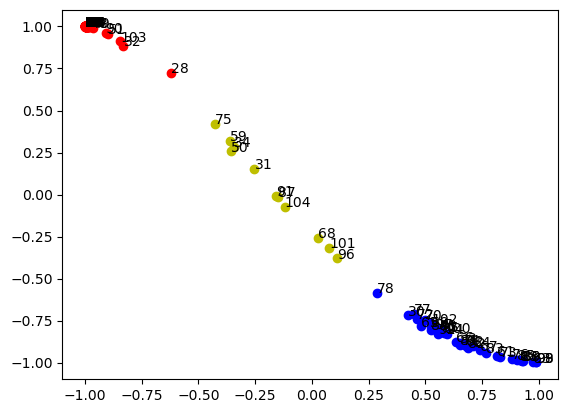

2回目 ARI : 0.455618291497174
===========================3回目============================
埋め込み結果


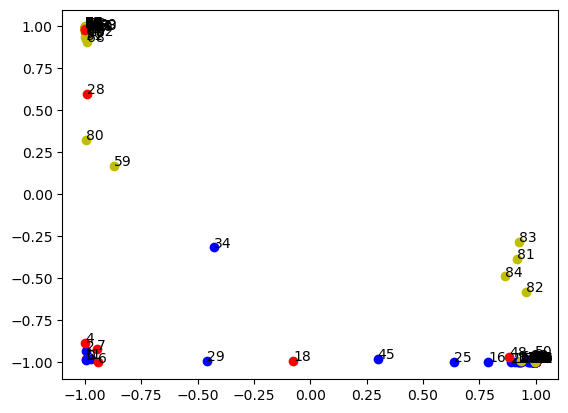

クラスタリング結果


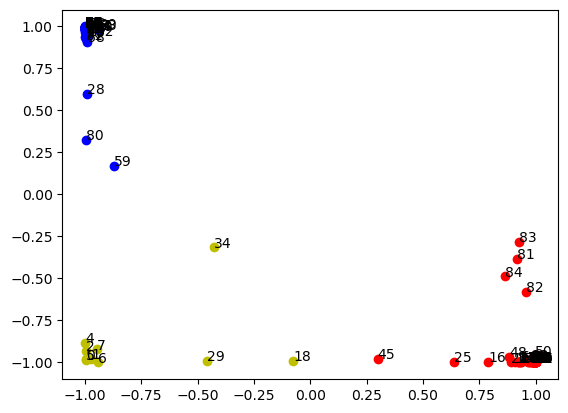

3回目 ARI : 0.5172093388254505
===========================4回目============================
埋め込み結果


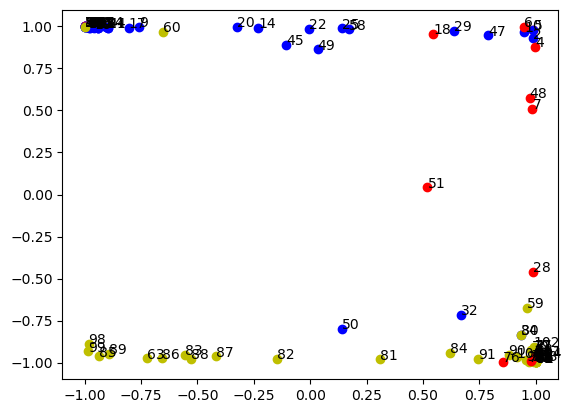

クラスタリング結果


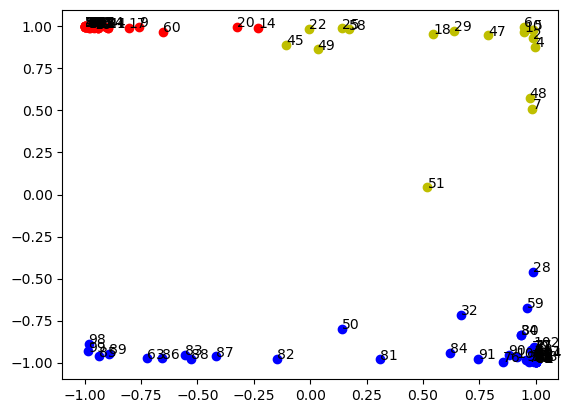

4回目 ARI : 0.4994102756553399
===========================5回目============================
埋め込み結果


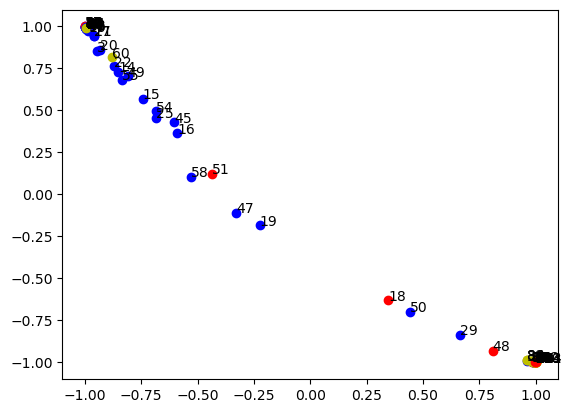

クラスタリング結果


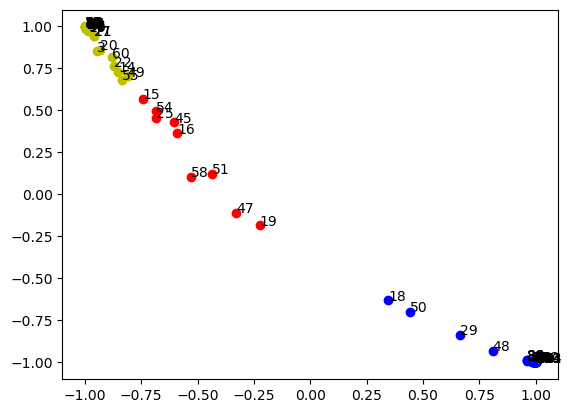

5回目 ARI : 0.34693317210053265
===========================6回目============================
埋め込み結果


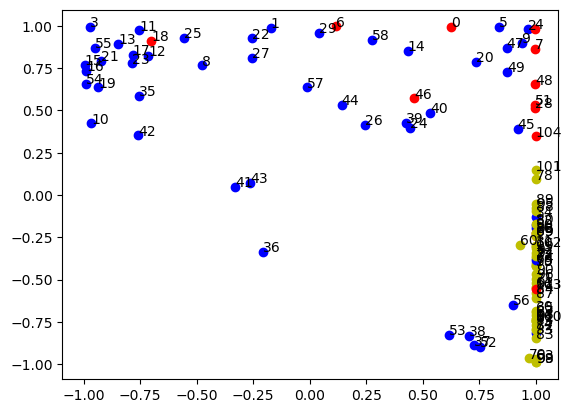

クラスタリング結果


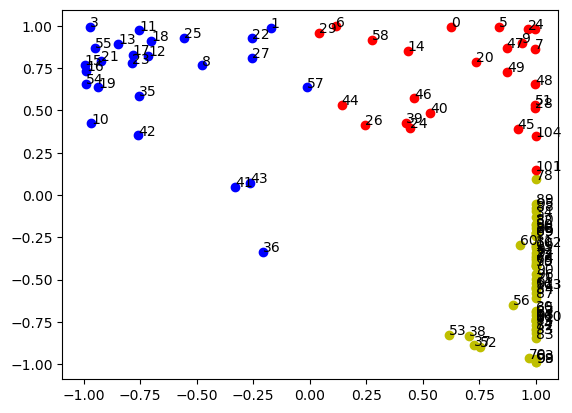

6回目 ARI : 0.38719370803077374
===========================7回目============================
埋め込み結果


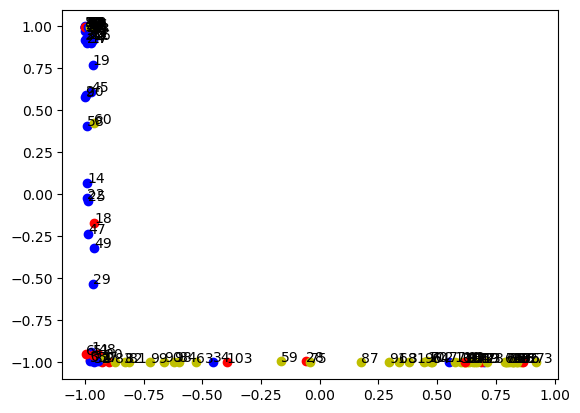

クラスタリング結果


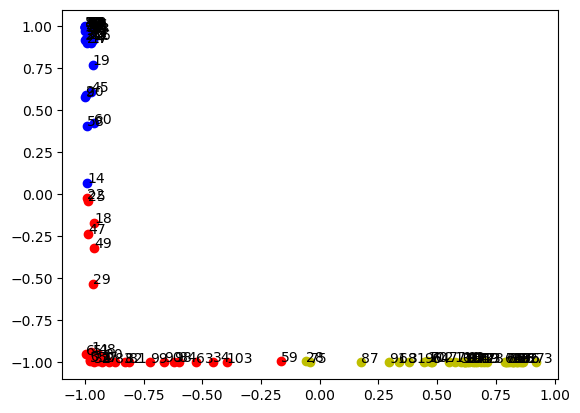

7回目 ARI : 0.40572149181972783
===========================8回目============================
埋め込み結果


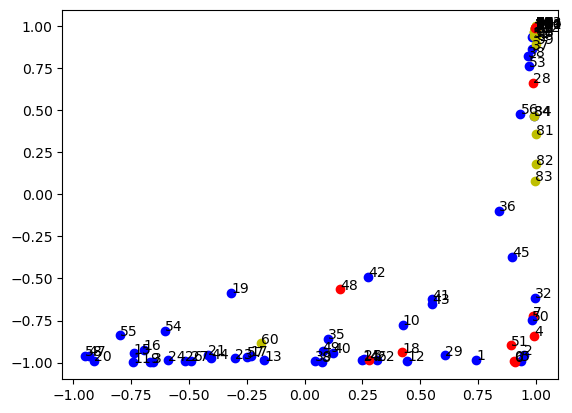

クラスタリング結果


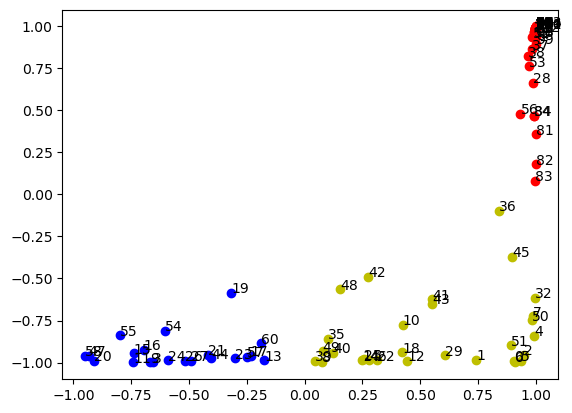

8回目 ARI : 0.38259703971091646
===========================9回目============================
埋め込み結果


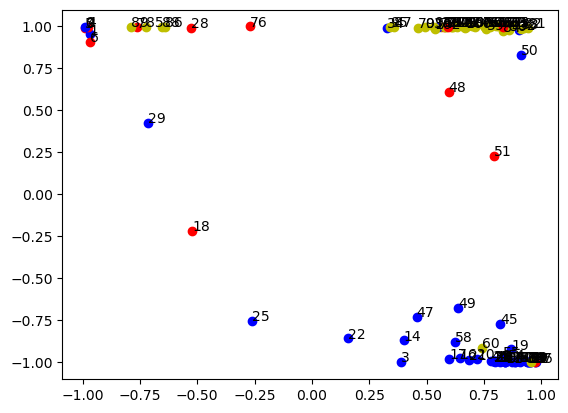

クラスタリング結果


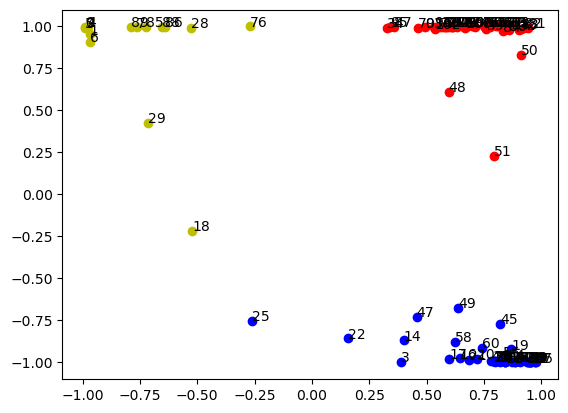

9回目 ARI : 0.5199310376655099
===========================10回目============================
埋め込み結果


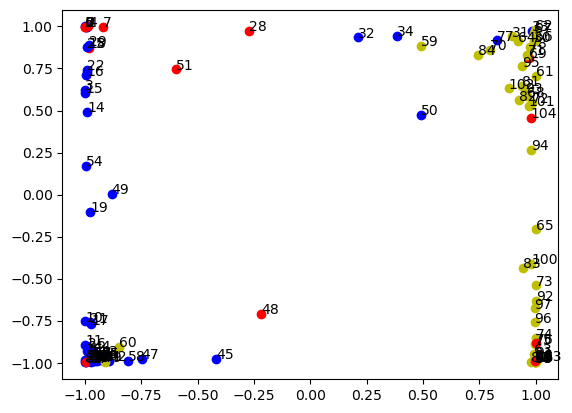

クラスタリング結果


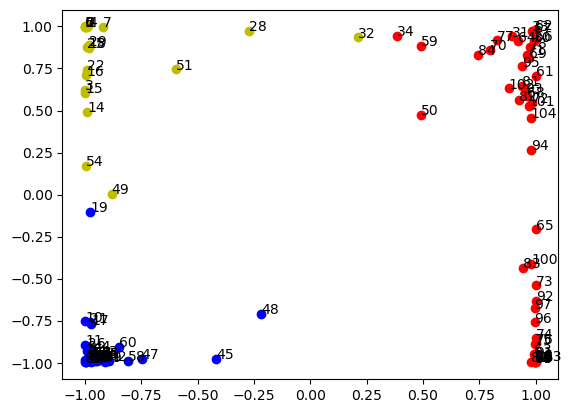

10回目 ARI : 0.49727102784601035
最大ARI([1]回目実行) : 0.5265811309818181
最小ARI([5]回目実行) : 0.34693317210053265
平均ARI : 0.4538466514133253
標準偏差 : 0.06741478974372321


In [3]:

ARI_list, max_EVM, min_EVM, max_pred, min_pred = gcn.exec_to_kmedoids(TIMES, NUM_TRAIN, EPOCH,VIEW_TRAIN, VIEW_CLUSTERING, N_CLUSTER, TRUE_LABEL, METHOD, DATA)

